**Too similar**

In [1]:
import pandas as pd
import requests
from IPython.display import Image
import time
from ftplib import FTP

from PIL import Image
from PIL import ImageFile
import rawpy
import imageio
ImageFile.LOAD_TRUNCATED_IMAGES = True


import os, shutil

import os
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
imagecount = 40

In [3]:
typdict = {'NDC':'str'}
df = pd.read_csv('../data/directory_of_images.txt',sep='|', dtype=typdict, names=['NDC','IDK','FILE','TYPE','DRUG'])
df = df.dropna()
df.DRUG = df.DRUG.str.upper()
df[['ORIG_FOLDER','IMAGES','FILENAME']] = df.FILE.str.split('/', expand=True)
df['FILETYPE'] = df.FILENAME.str[-4:]
df = df[df.FILETYPE != '.WMV']

In [4]:
ndcs = df.NDC.value_counts()
n = ndcs[ndcs == imagecount].index
# #n100 = ndcs[ndcs <= 100].index
# ndcs50100 = list(set(n50) & set(n100))
dfn = df[df.NDC.isin(n)]
dfn

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
7092,00071053023,1,PillProjectDisc17/images/B1M--T6QDNR9!2FF!4YS4...,C3PI_Reference,ACCUPRIL 10MG TABLETS,PillProjectDisc17,images,B1M--T6QDNR9!2FF!4YS4MFI04ELTMS.CR2,.CR2
7093,00071053023,1,PillProjectDisc31/images/BEUX5BD-MO2-03ZWNGOCJ...,C3PI_Reference,ACCUPRIL 10MG TABLETS,PillProjectDisc31,images,BEUX5BD-MO2-03ZWNGOCJY23IG1J41A.CR2,.CR2
7094,00071053023,1,PillProjectDisc103/images/UBLH!ZAG8!191BAMQ0RF...,C3PI_Test,ACCUPRIL 10MG TABLETS,PillProjectDisc103,images,UBLH!ZAG8!191BAMQ0RFQCW8XFF5BM.JPG,.JPG
7095,00071053023,1,PillProjectDisc109/images/ZZRHMN10V6PQ!XIGGD-!...,C3PI_Test,ACCUPRIL 10MG TABLETS,PillProjectDisc109,images,ZZRHMN10V6PQ!XIGGD-!H1ISO3FA6L.JPG,.JPG
7096,00071053023,1,PillProjectDisc110/images/_RLL7-!0E7ZMI84EXSIT...,C3PI_Test,ACCUPRIL 10MG TABLETS,PillProjectDisc110,images,_RLL7-!0E7ZMI84EXSITQO1TF13!FG.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
121440,65162054111,1,PillProjectDisc73/images/COZINUWY30S-7XDPGFHU6...,MC_CHALLENGE_V1.0,CYCLOBENZAPRINE 10MG TABS,PillProjectDisc73,images,COZINUWY30S-7XDPGFHU6OZQJWILB6Y.JPG,.JPG
121441,65162054111,1,PillProjectDisc105/images/VZDZW7PGVD3NTWD7MVW1...,MC_COOKED_CALIBRATED_V1.2,CYCLOBENZAPRINE 10MG TABS,PillProjectDisc105,images,VZDZW7PGVD3NTWD7MVW1CV8ONUEZGF.PNG,.PNG
121442,65162054111,1,PillProjectDisc106/images/WXG7-ZQWNNLXJKMEVXTX...,MC_COOKED_CALIBRATED_V1.2,CYCLOBENZAPRINE 10MG TABS,PillProjectDisc106,images,WXG7-ZQWNNLXJKMEVXTX8B1BL-J4NO.PNG,.PNG
121443,65162054111,1,PillProjectDisc14/images/B!Y8QQP_J69__O99TV5E2...,MC_COOKED_CALIBRATED_V1.2,CYCLOBENZAPRINE 10MG TABS,PillProjectDisc14,images,B!Y8QQP_J69__O99TV5E22R225050VD.PNG,.PNG


In [5]:
dfn.DRUG.value_counts()

AMIODARONE HYDROCHLORIDE                              80
SERTRALINE HYDROCHLORIDE                              40
METOPROLOL TARTRATE TABLETS USP                       40
CYCLOBENZAPRINE 10MG TABS                             40
ENALAPRIL MALEATE                                     40
LOVASTATIN                                            40
LOVASTATIN TABLETS USP                                40
PREDNISONE                                            40
BACLOFEN                                              40
SPIRONOLACTONE                                        40
DILTIAZEM SR 60MG CAPSULES                            40
LISINOPRIL TABLETS USP                                40
HYDROCHLOROTHIAZIDE                                   40
FUROSEMIDE                                            40
ACCUPRIL 10MG TABLETS                                 40
METOPROLOL ER 100MG TAB                               25
METOPROLOL SUCCINATE EXTENDED-RELEASE TABLETS, USP    15
Name: DRUG, dtype: int64

In [6]:
drugs = dfn.NDC.value_counts()
drugslist = drugs.index.tolist()
len(dfn.NDC.value_counts()),drugs

(17,
 00603385721    40
 00378105301    40
 00093913306    40
 53489014301    40
 00603240621    40
 00591040901    40
 62037079360    40
 51672402504    40
 59762491001    40
 59762130101    40
 00228263406    40
 00378606001    40
 00071053023    40
 65162054111    40
 62037083201    40
 00143147301    40
 00378023201    40
 Name: NDC, dtype: int64)

In [7]:
df_a = dfn.groupby(['DRUG','NDC']).count()
df_a.reset_index(inplace=True)
drug_ndc = df_a[['DRUG','NDC']]
drug_ndc

,DRUG,NDC
0,ACCUPRIL 10MG TABLETS,00071053023
1,AMIODARONE HYDROCHLORIDE,00093913306
2,AMIODARONE HYDROCHLORIDE,51672402504
3,BACLOFEN,00603240621
4,CYCLOBENZAPRINE 10MG TABS,65162054111
5,DILTIAZEM SR 60MG CAPSULES,00378606001
6,ENALAPRIL MALEATE,00378105301
7,FUROSEMIDE,00378023201
8,HYDROCHLOROTHIAZIDE,00603385721
9,LISINOPRIL TABLETS USP,00591040901


In [8]:
droplist = ['']

df = dfn[~dfn.NDC.isin(droplist)]

In [9]:
df.DRUG[df.NDC == '00093227434'] = 'AMOXICIL/CLAVULANATE 500/125MG'
df.DRUG[df.NDC == '68546014256'] = 'AZILECT 0.5MG'
df.DRUG[df.NDC == '00093423401'] = 'BUMETANIDE 2MG'
df.DRUG[df.NDC == '00093030801'] = 'CLEMASTINE FUMARATE 2.68 MG'
df.DRUG[df.NDC == '00555063402'] = 'DANAZOL 100MG'
df.DRUG[df.NDC == '00093312501'] = 'DICLOXACILLIN SOD 500MG'
df.DRUG[df.NDC == '00093511898'] = 'DILTIAZEM XR 240MG'
df.DRUG[df.NDC == '00093511798'] = 'DILTIAZEM ER 180MG'
df.DRUG[df.NDC == '68462012705'] = 'GABAPENTIN 800MG'
df.DRUG[df.NDC == '55111032001'] = 'GLIMEPIRIDE 1MG'
df.DRUG[df.NDC == '00781139101'] = 'HALOPERIDOL 0.5MG'
df.DRUG[df.NDC == '31722052010'] = 'HYDRALAZINE 25MG'
df.DRUG[df.NDC == '00093031401'] = 'KETOROLAC 10MG'
df.DRUG[df.NDC == '00093736498'] = 'LOSARTAN 25MG'
df.DRUG[df.NDC == '00555077902'] = 'MEDROXYPROGESTERONE'

/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [10]:
df

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
7092,00071053023,1,PillProjectDisc17/images/B1M--T6QDNR9!2FF!4YS4...,C3PI_Reference,ACCUPRIL 10MG TABLETS,PillProjectDisc17,images,B1M--T6QDNR9!2FF!4YS4MFI04ELTMS.CR2,.CR2
7093,00071053023,1,PillProjectDisc31/images/BEUX5BD-MO2-03ZWNGOCJ...,C3PI_Reference,ACCUPRIL 10MG TABLETS,PillProjectDisc31,images,BEUX5BD-MO2-03ZWNGOCJY23IG1J41A.CR2,.CR2
7094,00071053023,1,PillProjectDisc103/images/UBLH!ZAG8!191BAMQ0RF...,C3PI_Test,ACCUPRIL 10MG TABLETS,PillProjectDisc103,images,UBLH!ZAG8!191BAMQ0RFQCW8XFF5BM.JPG,.JPG
7095,00071053023,1,PillProjectDisc109/images/ZZRHMN10V6PQ!XIGGD-!...,C3PI_Test,ACCUPRIL 10MG TABLETS,PillProjectDisc109,images,ZZRHMN10V6PQ!XIGGD-!H1ISO3FA6L.JPG,.JPG
7096,00071053023,1,PillProjectDisc110/images/_RLL7-!0E7ZMI84EXSIT...,C3PI_Test,ACCUPRIL 10MG TABLETS,PillProjectDisc110,images,_RLL7-!0E7ZMI84EXSITQO1TF13!FG.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
121440,65162054111,1,PillProjectDisc73/images/COZINUWY30S-7XDPGFHU6...,MC_CHALLENGE_V1.0,CYCLOBENZAPRINE 10MG TABS,PillProjectDisc73,images,COZINUWY30S-7XDPGFHU6OZQJWILB6Y.JPG,.JPG
121441,65162054111,1,PillProjectDisc105/images/VZDZW7PGVD3NTWD7MVW1...,MC_COOKED_CALIBRATED_V1.2,CYCLOBENZAPRINE 10MG TABS,PillProjectDisc105,images,VZDZW7PGVD3NTWD7MVW1CV8ONUEZGF.PNG,.PNG
121442,65162054111,1,PillProjectDisc106/images/WXG7-ZQWNNLXJKMEVXTX...,MC_COOKED_CALIBRATED_V1.2,CYCLOBENZAPRINE 10MG TABS,PillProjectDisc106,images,WXG7-ZQWNNLXJKMEVXTX8B1BL-J4NO.PNG,.PNG
121443,65162054111,1,PillProjectDisc14/images/B!Y8QQP_J69__O99TV5E2...,MC_COOKED_CALIBRATED_V1.2,CYCLOBENZAPRINE 10MG TABS,PillProjectDisc14,images,B!Y8QQP_J69__O99TV5E22R225050VD.PNG,.PNG


In [11]:
df.DRUG.value_counts()

AMIODARONE HYDROCHLORIDE                              80
SERTRALINE HYDROCHLORIDE                              40
METOPROLOL TARTRATE TABLETS USP                       40
CYCLOBENZAPRINE 10MG TABS                             40
ENALAPRIL MALEATE                                     40
LOVASTATIN                                            40
LOVASTATIN TABLETS USP                                40
PREDNISONE                                            40
BACLOFEN                                              40
SPIRONOLACTONE                                        40
DILTIAZEM SR 60MG CAPSULES                            40
LISINOPRIL TABLETS USP                                40
HYDROCHLOROTHIAZIDE                                   40
FUROSEMIDE                                            40
ACCUPRIL 10MG TABLETS                                 40
METOPROLOL ER 100MG TAB                               25
METOPROLOL SUCCINATE EXTENDED-RELEASE TABLETS, USP    15
Name: DRUG, dtype: int64

In [12]:
df_a = df.groupby(['DRUG','NDC']).count()
df_a.reset_index(inplace=True)
drug_ndc = df_a[['DRUG','NDC']]
drug_ndc

,DRUG,NDC
0,ACCUPRIL 10MG TABLETS,00071053023
1,AMIODARONE HYDROCHLORIDE,00093913306
2,AMIODARONE HYDROCHLORIDE,51672402504
3,BACLOFEN,00603240621
4,CYCLOBENZAPRINE 10MG TABS,65162054111
5,DILTIAZEM SR 60MG CAPSULES,00378606001
6,ENALAPRIL MALEATE,00378105301
7,FUROSEMIDE,00378023201
8,HYDROCHLOROTHIAZIDE,00603385721
9,LISINOPRIL TABLETS USP,00591040901


## Sample Batch

In [13]:
samplesdf = df.groupby(['NDC']).min().reset_index()
samplesdf

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
0,00071053023,1,PillProjectDisc103/images/UBLH!ZAG8!191BAMQ0RF...,C3PI_Reference,ACCUPRIL 10MG TABLETS,PillProjectDisc103,images,86213P7XJ5-!A_E88T0TRIT5ACPYO0.JPG,.CR2
1,00093913306,1,PillProjectDisc1/images/!J-Q7EVM38XDT8GVESTJV3...,C3PI_Reference,AMIODARONE HYDROCHLORIDE,PillProjectDisc1,images,!J-Q7EVM38XDT8GVESTJV30HCW45X.JPG,.CR2
2,00143147301,1,PillProjectDisc1/images/!2QPZ5P1WZS113O4WIH22S...,C3PI_Reference,PREDNISONE,PillProjectDisc1,images,!2QPZ5P1WZS113O4WIH22SVN2U7QPL.PNG,.CR2
3,00228263406,1,PillProjectDisc10/images/6_LA4MNIV23WPGUGFM2YM...,C3PI_Reference,LOVASTATIN,PillProjectDisc10,images,6_LA4MNIV23WPGUGFM2YMD1E!E6GJN.PNG,.CR2
4,00378023201,1,PillProjectDisc108/images/YM53QYFP0571MJE312ZA...,C3PI_Reference,FUROSEMIDE,PillProjectDisc108,images,-GS6T5U9AG!3UUS8A7FTS!6JY38MD4.JPG,.CR2
5,00378105301,1,PillProjectDisc1/images/!EAAN3HTSBI34K5Y_QMKDE...,C3PI_Reference,ENALAPRIL MALEATE,PillProjectDisc1,images,!EAAN3HTSBI34K5Y_QMKDE8VX5X!AV.JPG,.CR2
6,00378606001,1,PillProjectDisc104/images/V0WI-JNPNOYUQSBMPKG5...,C3PI_Reference,DILTIAZEM SR 60MG CAPSULES,PillProjectDisc104,images,--EUTL1!WN87YOKW444XV5TXNDDWWF.PNG,.CR2
7,00591040901,1,PillProjectDisc1/images/!-XQX658WMK7NVP!T1T5EK...,C3PI_Reference,LISINOPRIL TABLETS USP,PillProjectDisc1,images,!-XQX658WMK7NVP!T1T5EKUT_YIOKT.PNG,.CR2
8,00603240621,1,PillProjectDisc100/images/RGF3-3RTNIABABTD1WDF...,C3PI_Reference,BACLOFEN,PillProjectDisc100,images,-QLBB_K0RV1O6YPADQ95WA!XPBS!L2.JPG,.CR2
9,00603385721,1,PillProjectDisc10/images/6OJOKNHEYMY7QXVS_6-ZP...,C3PI_Reference,HYDROCHLOROTHIAZIDE,PillProjectDisc10,images,6-UPT76IUOVYT!05JRED4ML7JZNWG!.JPG,.CR2


In [14]:
sampleslist = samplesdf.FILE.tolist()
sampleslist.sort()
sampleslist

['PillProjectDisc1/images/!!AL_S32_MMZYQFMGP9WUKGMRUS3_O.PNG',
 'PillProjectDisc1/images/!-XQX658WMK7NVP!T1T5EKUT_YIOKT.PNG',
 'PillProjectDisc1/images/!2QPZ5P1WZS113O4WIH22SVN2U7QPL.PNG',
 'PillProjectDisc1/images/!EAAN3HTSBI34K5Y_QMKDE8VX5X!AV.JPG',
 'PillProjectDisc1/images/!J-Q7EVM38XDT8GVESTJV30HCW45X.JPG',
 'PillProjectDisc1/images/!TMM_067!80YHUJLY9KOYJEAP0QS5C.PNG',
 'PillProjectDisc10/images/6OJOKNHEYMY7QXVS_6-ZPVDY068SHJ.JPG',
 'PillProjectDisc10/images/6_LA4MNIV23WPGUGFM2YMD1E!E6GJN.PNG',
 'PillProjectDisc100/images/RGF3-3RTNIABABTD1WDF!82R34-DL_.JPG',
 'PillProjectDisc101/images/RS1S277ZJYYGBHC0X11QN_1-4G1OQ5.JPG',
 'PillProjectDisc101/images/RZ4I8K5JE!4E3RY4!GYA-!!39U3NJ9.JPG',
 'PillProjectDisc103/images/TW9_X1-U2YDRBPYH!CJ!H68IVH87-L.PNG',
 'PillProjectDisc103/images/UBLH!ZAG8!191BAMQ0RFQCW8XFF5BM.JPG',
 'PillProjectDisc103/images/UBWUNLNBEE316XDHZJP7YO7TVQSMYV.JPG',
 'PillProjectDisc104/images/V0WI-JNPNOYUQSBMPKG5VPSLF515JE.PNG',
 'PillProjectDisc105/images/VCIB6DH9N7!X

In [15]:
ftpdir = {}
for i in range(0,len(sampleslist)):
    ftpcall = sampleslist[i].split('/')
    ftppath = ftpcall[0]+'/'+ftpcall[1]+ '/'
    ftpfile = ftpcall[-1]
    ftpdir.setdefault(ftppath,[])
    ftpdir[ftppath].append(ftpfile)
len(ftpdir)

8

In [16]:
%cd /Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data

folder = 'img'+str(imagecount)
paths = folder + '/' + folder
print(folder, paths)

try:
    os.makedirs(paths)
except:
    print('Folder present')

%cd $folder
%pwd
dloaded = os.listdir()
for key in ftpdir.keys():
    ftp = FTP('lhcftp.nlm.nih.gov')
    ftp.login()
    ftp.cwd('Open-Access-Datasets/Pills//')
    ftp.cwd(key)
    for value in ftpdir[key]:
        if value not in dloaded:
            with open(value, 'wb') as fp:
                ftp.retrbinary('RETR '+ value, fp.write)
    ftp.cwd('..')
    ftp.cwd('..')

! cd ..

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data
img40 img40/img40
/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img40


In [17]:
%pwd

'/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img40'

In [18]:
for filename in os.listdir():
    if filename.endswith(".PNG") or filename.endswith(".JPG"): 
        im1 = Image.open(r'{}'.format(filename))
        rgb_im = im1.convert('RGB')
        rgb_im.save(r'{}/{}.JPG'.format(folder,filename[:-4]))
        continue
    elif filename.endswith(".CR2") and os.path.getsize(filename) > 0:
        print(filename)
        raw = rawpy.imread('{}'.format(filename))
        rgb = raw.postprocess()
        imageio.imsave('{}/{}.JPG'.format(folder,filename[:-4]), rgb)
        print(filename)
        continue
    

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img40/img40


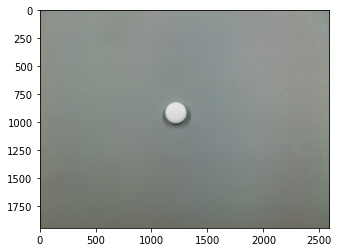

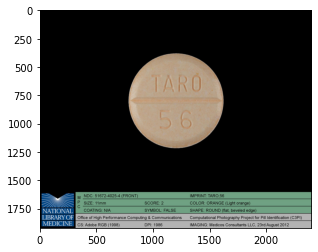

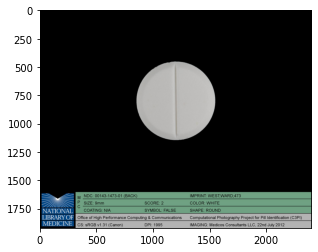

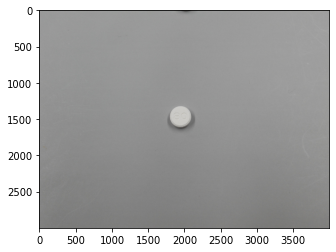

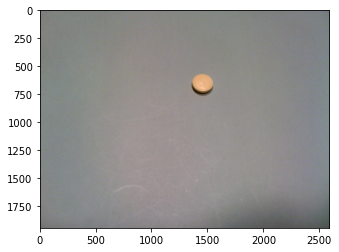

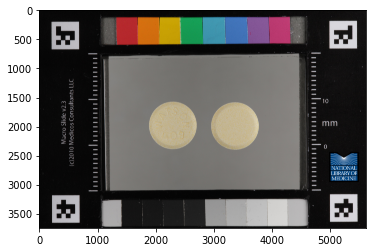

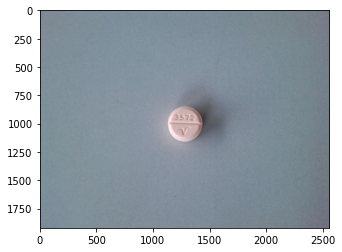

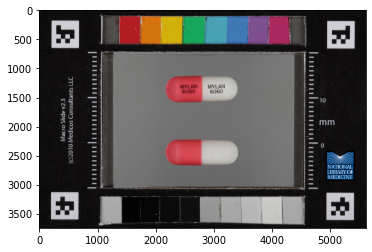

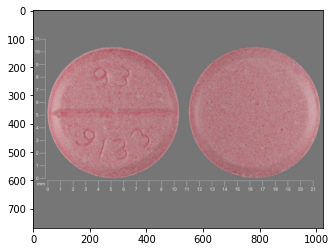

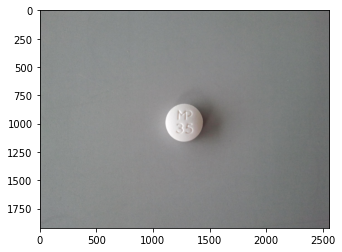

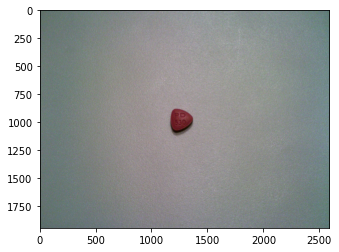

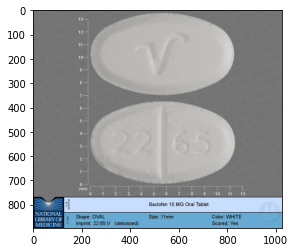

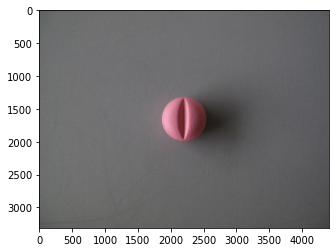

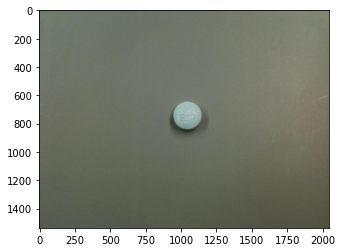

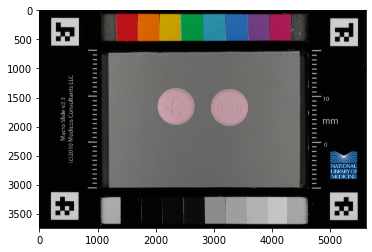

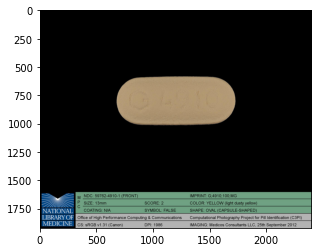

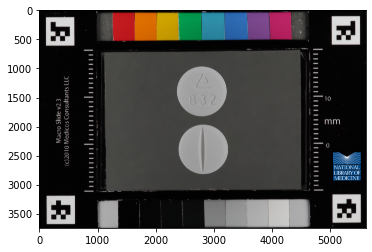

In [19]:
%cd $folder

images = os.listdir()
def process(filename):
    image = mpimg.imread(filename)
    plt.figure()
    plt.imshow(image)

for file in images:
    process(file)

In [22]:
drugsftp = df.FILE.tolist()
drugsftp.sort()
drugsftp[:10]

['PillProjectDisc1/images/!!SRPQXAASBCQPWTY-1_4ONT78S2KK.JPG',
 'PillProjectDisc1/images/!99Q2YI6N7XBRNIV521EXYA051ES_E.JPG',
 'PillProjectDisc1/images/!G2OJPKYTI7ES1-OW251RY6PK6BHU-.JPG',
 'PillProjectDisc1/images/!L72!LZSGQBPUUDO56-XU6KVC45OKW.JPG',
 'PillProjectDisc1/images/!UGIF6I_H_5XC6_A916LVOYLST0SAO.CR2',
 'PillProjectDisc10/images/7135DCC7VXGE3I8F9_QOZ0JWYHZUT4.JPG',
 'PillProjectDisc10/images/7CBG_85RQOODGTH030MF3UI_3PS21B.PNG',
 'PillProjectDisc10/images/7EO-XG_FK7T16N7ADOU0CWL1MJT3CX.JPG',
 'PillProjectDisc100/images/QV3PUW3N2HL6KF8HSXV_1KL7HH98!E.JPG',
 'PillProjectDisc100/images/QY_4JH6D4YSSXZZHN2L!7LGE08P4QZ.PNG']

In [23]:
ftpdir = {}
for i in range(0,len(drugsftp)):
    ftpcall = drugsftp[i].split('/')
    ftppath = ftpcall[0]+'/'+ftpcall[1]+ '/'
    ftpfile = ftpcall[-1]
    ftpdir.setdefault(ftppath,[])
    ftpdir[ftppath].append(ftpfile)
len(ftpdir)

110

In [ ]:
%cd /content/drive/My Drive/Project: Pill ID/Data
for key in ftpdir.keys():
    #%cd /content/drive/My Drive/Project: Pill ID/Data
    ftp = FTP('lhcftp.nlm.nih.gov')
    ftp.login()
    ftp.cwd('Open-Access-Datasets/Pills//')
    ftp.cwd(key)
    dloaded = os.listdir('/content/drive/My Drive/Project: Pill ID/Data')
    print(key)
    for value in ftpdir[key]:
      if value not in dloaded:
        with open(value, 'wb') as fp:
            ftp.retrbinary('RETR '+ value, fp.write)
    ftp.cwd('..')
    ftp.cwd('..')